In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/telecom_customer_churn.csv')
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [5]:
df.shape

(7043, 38)

#**Insight**:
This dataset contains 7,043 features of customers and 38 attributes which is good enough to create an accurate model that predicts churn.

In [6]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

#**Insight**:

The dataset is composed of:

- Customer demographics

- Service-related details

- Billing and payment information

- Customer status and churn information

This variability contributes to a robust predictive model.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

#**Insight**:

- Dataset contains both **numerical and categorical variables**

- Some columns contain **missing values**, which need to be handled

- Data types are mostly appropriate but need encoding before modeling

In [8]:
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


#**Insight**:

- Identify **outliers, range of values, and data distribution**

- Monthly charges and tenure show wide variation

- Useful for understanding customer behavior trends

In [9]:
df.isnull().sum().sort_values(ascending=False)

,0
Churn Reason,5174
Churn Category,5174
Offer,3877
Online Backup,1526
Avg Monthly GB Download,1526
Online Security,1526
Streaming Movies,1526
Streaming TV,1526
Unlimited Data,1526
Streaming Music,1526


#**Insight**:

- Some columns contain **missing values**

- Missing values must be handled to avoid model bias or errors

In [10]:
df['Customer Status'].value_counts()

,count
Customer Status,
Stayed,4720
Churned,1869
Joined,454


#**Insight**:

- Target variable: Customer Status

- Categories: Churned, Stayed, Joined

- For modeling, this will be converted into a binary target (Churn / Not Churn)

#DATA CLEANING

In [11]:
df.drop(['Customer ID', 'Latitude', 'Longitude'], axis=1, inplace=True)

#**Insight**:

- Customer ID is only an identifier and does not influence churn.

- Latitude & Longitude are geographical values that does not affect churn behavior.

In [12]:
df.isnull().sum()

,0
Gender,0
Age,0
Married,0
Number of Dependents,0
City,0
Zip Code,0
Number of Referrals,0
Tenure in Months,0
Offer,3877
Phone Service,0


In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.dtypes

,0
Gender,object
Age,int64
Married,object
Number of Dependents,int64
City,object
Zip Code,int64
Number of Referrals,int64
Tenure in Months,int64
Offer,object
Phone Service,object


In [15]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [16]:
df

,gender,age,married,number_of_dependents,city,zip_code,number_of_referrals,tenure_in_months,offer,phone_service,...,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason
0,Female,37,Yes,0,Frazier Park,93225,2,9,NaN,Yes,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,Male,46,No,0,Glendale,91206,0,9,NaN,Yes,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,Male,50,No,0,Costa Mesa,92627,0,4,Offer E,Yes,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,Male,78,Yes,0,Martinez,94553,1,13,Offer D,Yes,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,Female,75,Yes,0,Camarillo,93010,3,3,NaN,Yes,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,20,No,0,La Mesa,91941,0,13,Offer D,Yes,...,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,Male,40,Yes,0,Riverbank,95367,1,22,Offer D,Yes,...,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,Male,22,No,0,Elk,95432,0,2,Offer E,Yes,...,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,Male,21,Yes,0,Solana Beach,92075,5,67,Offer A,Yes,...,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


In [17]:
df.drop(columns='offer',inplace=True) #many missing values

In [18]:
df

,gender,age,married,number_of_dependents,city,zip_code,number_of_referrals,tenure_in_months,phone_service,avg_monthly_long_distance_charges,...,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason
0,Female,37,Yes,0,Frazier Park,93225,2,9,Yes,42.39,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,Male,46,No,0,Glendale,91206,0,9,Yes,10.69,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,Male,50,No,0,Costa Mesa,92627,0,4,Yes,33.65,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,Male,78,Yes,0,Martinez,94553,1,13,Yes,27.82,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,Female,75,Yes,0,Camarillo,93010,3,3,Yes,7.38,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,20,No,0,La Mesa,91941,0,13,Yes,46.68,...,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,Male,40,Yes,0,Riverbank,95367,1,22,Yes,16.20,...,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,Male,22,No,0,Elk,95432,0,2,Yes,18.62,...,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,Male,21,Yes,0,Solana Beach,92075,5,67,Yes,2.12,...,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


In [19]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [20]:
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

/tmp/ipython-input-518003605.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [21]:
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-1077209983.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [22]:
df.isnull().sum()

,0
gender,0
age,0
married,0
number_of_dependents,0
city,0
zip_code,0
number_of_referrals,0
tenure_in_months,0
phone_service,0
avg_monthly_long_distance_charges,0


In [23]:
df

,gender,age,married,number_of_dependents,city,zip_code,number_of_referrals,tenure_in_months,phone_service,avg_monthly_long_distance_charges,...,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason
0,Female,37,Yes,0,Frazier Park,93225,2,9,Yes,42.39,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,Competitor,Competitor had better devices
1,Male,46,No,0,Glendale,91206,0,9,Yes,10.69,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,Competitor,Competitor had better devices
2,Male,50,No,0,Costa Mesa,92627,0,4,Yes,33.65,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,Male,78,Yes,0,Martinez,94553,1,13,Yes,27.82,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,Female,75,Yes,0,Camarillo,93010,3,3,Yes,7.38,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,20,No,0,La Mesa,91941,0,13,Yes,46.68,...,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,Competitor,Competitor had better devices
7039,Male,40,Yes,0,Riverbank,95367,1,22,Yes,16.20,...,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,Male,22,No,0,Elk,95432,0,2,Yes,18.62,...,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,Competitor,Competitor had better devices
7041,Male,21,Yes,0,Solana Beach,92075,5,67,Yes,2.12,...,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,Competitor,Competitor had better devices


In [24]:
df[df['monthly_charge'] < 0]

,gender,age,married,number_of_dependents,city,zip_code,number_of_referrals,tenure_in_months,phone_service,avg_monthly_long_distance_charges,...,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason
1,Male,46,No,0,Glendale,91206,0,9,Yes,10.69,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,Competitor,Competitor had better devices
32,Male,28,Yes,0,Los Angeles,90063,9,66,Yes,43.77,...,Bank Withdrawal,-2.0,7942.15,0.00,0,2888.82,10830.97,Stayed,Competitor,Competitor had better devices
170,Male,21,Yes,2,Los Angeles,90040,9,7,No,25.69,...,Credit Card,-3.0,465.70,0.00,0,0.00,465.70,Stayed,Competitor,Competitor had better devices
232,Female,38,No,0,Sherman Oaks,91403,0,68,No,25.69,...,Credit Card,-8.0,4539.60,0.00,130,0.00,4669.60,Stayed,Competitor,Competitor had better devices
336,Male,78,Yes,0,Loma Mar,94021,1,5,Yes,6.66,...,Bank Withdrawal,-1.0,343.95,0.00,20,33.30,397.25,Churned,Competitor,Competitor offered more data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6894,Male,53,No,0,Foresthill,95631,0,23,Yes,48.21,...,Credit Card,-1.0,2192.90,0.00,0,1108.83,3301.73,Stayed,Competitor,Competitor had better devices
6918,Male,43,No,0,Northridge,91325,0,66,Yes,33.02,...,Bank Withdrawal,-7.0,6860.60,44.00,0,2179.32,8995.92,Stayed,Competitor,Competitor had better devices
6976,Female,65,Yes,0,Lee Vining,93541,1,40,Yes,49.50,...,Credit Card,-1.0,3640.45,0.00,0,1980.00,5620.45,Churned,Competitor,Competitor had better devices
7020,Male,79,No,0,Desert Center,92239,0,21,Yes,42.27,...,Bank Withdrawal,-1.0,2030.30,10.20,0,887.67,2907.77,Churned,Dissatisfaction,Product dissatisfaction


In [25]:
median_monthly_charge = df[df['monthly_charge'] > 0]['monthly_charge'].median()

df['monthly_charge'] = df['monthly_charge'].apply(
    lambda x: median_monthly_charge if x < 0 else x
)


In [26]:
df

,gender,age,married,number_of_dependents,city,zip_code,number_of_referrals,tenure_in_months,phone_service,avg_monthly_long_distance_charges,...,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason
0,Female,37,Yes,0,Frazier Park,93225,2,9,Yes,42.39,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,Competitor,Competitor had better devices
1,Male,46,No,0,Glendale,91206,0,9,Yes,10.69,...,Credit Card,70.35,542.40,38.33,10,96.21,610.28,Stayed,Competitor,Competitor had better devices
2,Male,50,No,0,Costa Mesa,92627,0,4,Yes,33.65,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,Male,78,Yes,0,Martinez,94553,1,13,Yes,27.82,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,Female,75,Yes,0,Camarillo,93010,3,3,Yes,7.38,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,20,No,0,La Mesa,91941,0,13,Yes,46.68,...,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,Competitor,Competitor had better devices
7039,Male,40,Yes,0,Riverbank,95367,1,22,Yes,16.20,...,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,Male,22,No,0,Elk,95432,0,2,Yes,18.62,...,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,Competitor,Competitor had better devices
7041,Male,21,Yes,0,Solana Beach,92075,5,67,Yes,2.12,...,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,Competitor,Competitor had better devices


In [27]:
df['total_refunds'].value_counts()

,count
total_refunds,
0.00,6518
5.73,2
8.74,2
1.31,2
41.74,2
...,...
2.93,1
33.73,1
16.91,1


In [28]:
df.columns

Index(['gender', 'age', 'married', 'number_of_dependents', 'city', 'zip_code',
       'number_of_referrals', 'tenure_in_months', 'phone_service',
       'avg_monthly_long_distance_charges', 'multiple_lines',
       'internet_service', 'internet_type', 'avg_monthly_gb_download',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charge', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue', 'customer_status', 'churn_category', 'churn_reason'],
      dtype='object')

#EDA

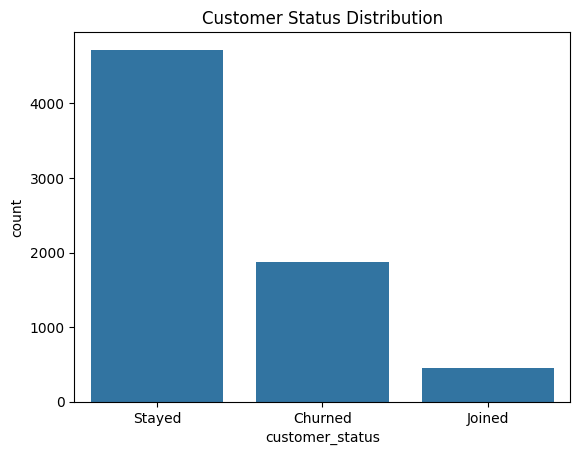

In [29]:
sns.countplot(x='customer_status', data=df)
plt.title("Customer Status Distribution")
plt.show()

#**Insight**:
1. Target Variable – Customer Status

- Shows how many customers stayed vs churned

- Helps understand class imbalance

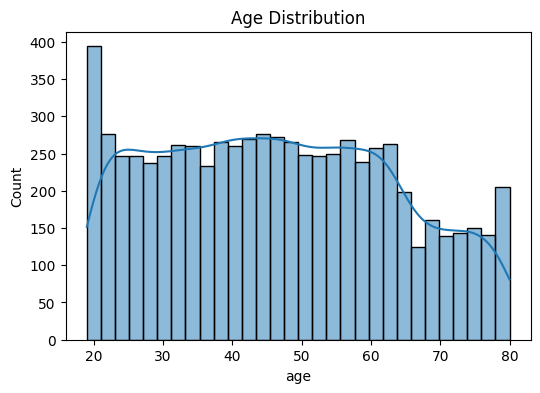

In [30]:
plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

#**Insight**:
2. Age Distribution
- Most customers fall within the middle-age group


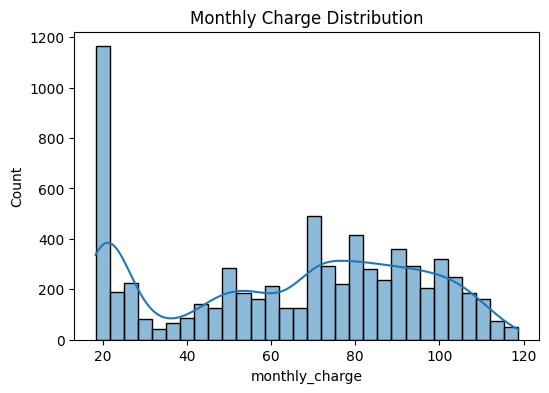

In [31]:
plt.figure(figsize=(6,4))
sns.histplot(df['monthly_charge'], bins=30, kde=True)
plt.title("Monthly Charge Distribution")
plt.show()

#**Insight**:

3. Monthly charge distribution

- Shows spending behavior.

- Higher charges may relate to higher churn.

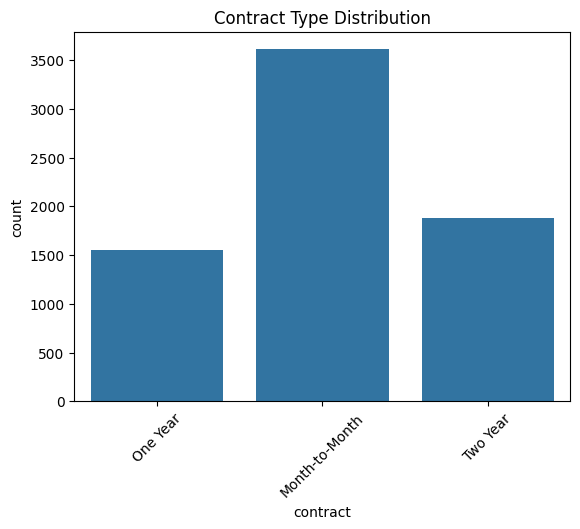

In [32]:
sns.countplot(x='contract', data=df)
plt.title("Contract Type Distribution")
plt.xticks(rotation=45)
plt.show()

#Insight

4. contarct type distribution

- Most customers are on month-to-month contracts

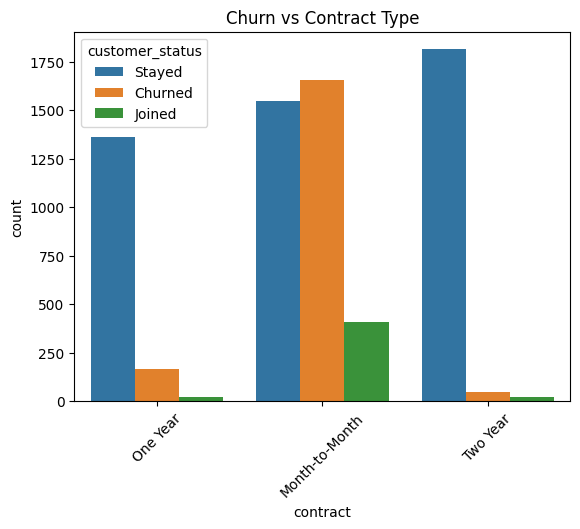

In [33]:
sns.countplot(x='contract', hue='customer_status', data=df)
plt.title("Churn vs Contract Type")
plt.xticks(rotation=45)
plt.show()

#Insight:

5. Churn vs Contract Type

- Month-to-month users have higher churn

- Long-term contracts reduce churn risk

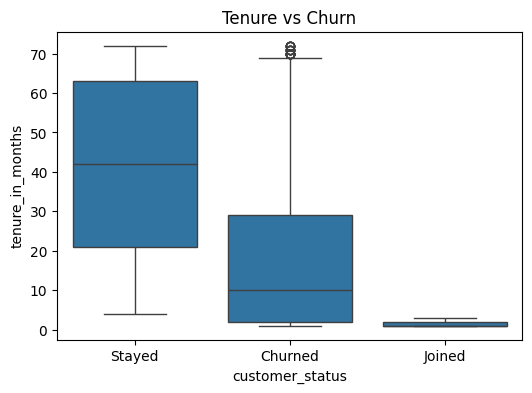

In [34]:
plt.figure(figsize=(6,4))
sns.boxplot(x='customer_status', y='tenure_in_months', data=df)
plt.title("Tenure vs Churn")
plt.show()


#Insight

6. Churn vs Tenure

- Customers with low tenure are more likely to churn

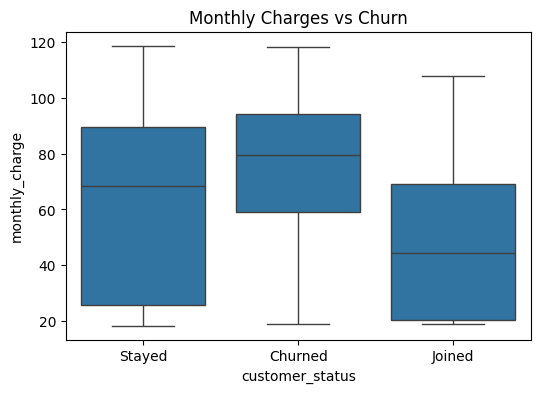

In [35]:
plt.figure(figsize=(6,4))
sns.boxplot(x='customer_status', y='monthly_charge', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

#Insight

7. Monthly charges vs churn

- Higher monthly charges increase churn probability

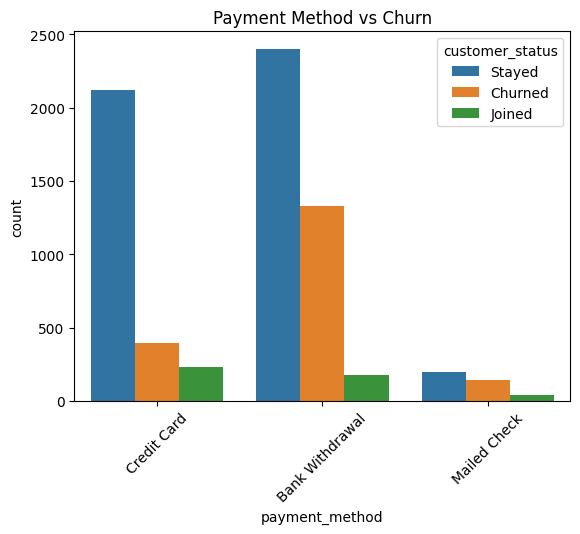

In [36]:
sns.countplot(x='payment_method', hue='customer_status', data=df)
plt.title("Payment Method vs Churn")
plt.xticks(rotation=45)
plt.show()

#Insight

8. payment method vs churn

- Some payment methods show higher churn

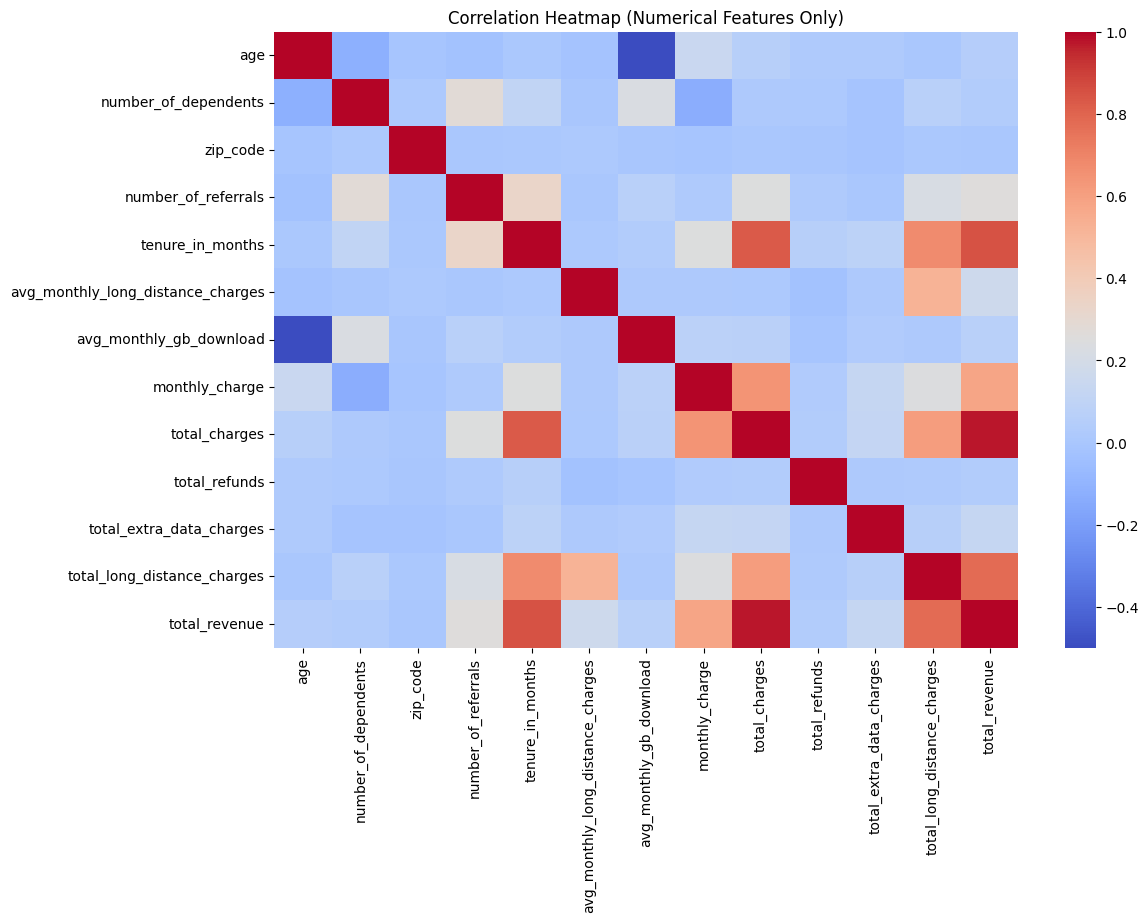

In [37]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap (Numerical Features Only)")
plt.show()

#Insight:

- Strong correlation between total charges and tenure

- Monthly charges moderately influence churn

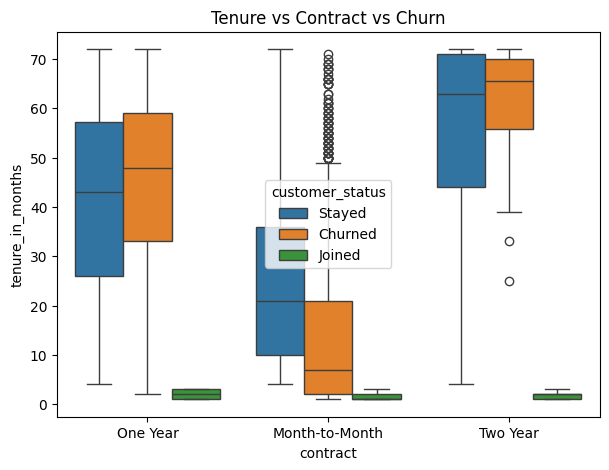

In [38]:
plt.figure(figsize=(7,5))
sns.boxplot(
    x='contract',
    y='tenure_in_months',
    hue='customer_status',
    data=df
)
plt.title("Tenure vs Contract vs Churn")
plt.show()


#Insight:

- Long-term contracts have higher tenure and lower churn

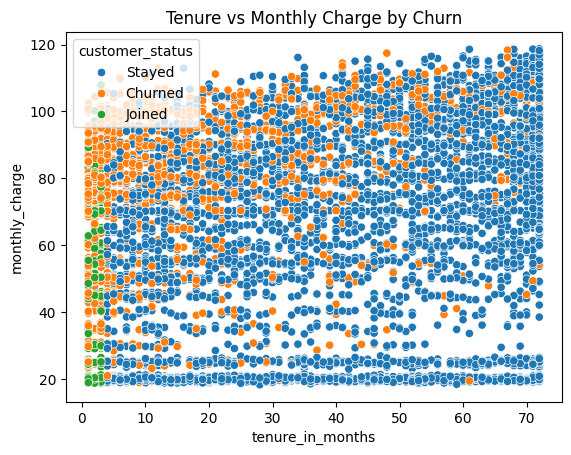

In [39]:
sns.scatterplot(
    x='tenure_in_months',
    y='monthly_charge',
    hue='customer_status',
    data=df
)
plt.title("Tenure vs Monthly Charge by Churn")
plt.show()


#Insight:

- High monthly charges + low tenure = high churn risk

In [40]:
df.to_csv("customer_churn_powerbi.csv", index=False)

#Encoding and feature scaling

In [41]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numerical Columns:\n", numerical_cols)
print("\nCategorical Columns:\n", categorical_cols)

Numerical Columns:
 Index(['age', 'number_of_dependents', 'zip_code', 'number_of_referrals',
       'tenure_in_months', 'avg_monthly_long_distance_charges',
       'avg_monthly_gb_download', 'monthly_charge', 'total_charges',
       'total_refunds', 'total_extra_data_charges',
       'total_long_distance_charges', 'total_revenue'],
      dtype='object')

Categorical Columns:
 Index(['gender', 'married', 'city', 'phone_service', 'multiple_lines',
       'internet_service', 'internet_type', 'online_security', 'online_backup',
       'device_protection_plan', 'premium_tech_support', 'streaming_tv',
       'streaming_movies', 'streaming_music', 'unlimited_data', 'contract',
       'paperless_billing', 'payment_method', 'customer_status',
       'churn_category', 'churn_reason'],
      dtype='object')


In [42]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [44]:
df.head()
df.describe()

,gender,age,married,number_of_dependents,city,zip_code,number_of_referrals,tenure_in_months,phone_service,avg_monthly_long_distance_charges,...,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason
count,7043.000000,7.043000e+03,7043.000000,7.043000e+03,7043.000000,7.043000e+03,7.043000e+03,7.043000e+03,7043.000000,7.043000e+03,...,7043.000000,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7043.000000,7043.000000,7043.000000
mean,0.504756,4.287671e-18,0.483033,1.008864e-18,588.042879,-2.491893e-16,3.026591e-18,-1.271168e-16,0.903166,2.153924e-16,...,0.499645,-2.910572e-16,6.053182e-18,-1.916841e-17,-1.715068e-17,1.361966e-16,-1.271168e-16,1.404799,1.142553,3.162999
std,0.500013,1.000071e+00,0.499748,1.000071e+00,307.797647,1.000071e+00,1.000071e+00,1.000071e+00,0.295752,1.000071e+00,...,0.599483,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,0.878514,0.665505,3.561065
min,0.000000,-1.642454e+00,0.000000,-4.868349e-01,0.000000,-1.877089e+00,-6.504085e-01,-1.278988e+00,0.000000,-1.810856e+00,...,0.000000,-1.562033e+00,-9.980237e-01,-2.483130e-01,-2.733004e-01,-8.848326e-01,-1.051664e+00,0.000000,0.000000,0.000000
25%,0.000000,-8.662956e-01,0.000000,-4.868349e-01,331.000000,-7.460110e-01,-6.504085e-01,-9.529936e-01,1.000000,-8.145249e-01,...,0.000000,-9.516163e-01,-8.297360e-01,-2.483130e-01,-2.733004e-01,-8.015052e-01,-8.477376e-01,0.000000,1.000000,2.000000
50%,1.000000,-3.043292e-02,0.000000,-4.868349e-01,604.000000,1.719747e-02,-6.504085e-01,-1.380083e-01,1.000000,1.803606e-02,...,0.000000,1.829725e-01,-3.909126e-01,-2.483130e-01,-2.733004e-01,-4.106535e-01,-3.231200e-01,2.000000,1.000000,2.000000
75%,1.000000,8.054298e-01,1.000000,-4.868349e-01,854.000000,9.926177e-01,3.492628e-01,9.214727e-01,1.000000,8.113217e-01,...,1.000000,8.327444e-01,6.646863e-01,-2.483130e-01,-2.733004e-01,5.220893e-01,6.166720e-01,2.000000,1.000000,2.000000
max,1.000000,1.999519e+00,1.000000,8.861546e+00,1105.000000,1.434815e+00,3.015053e+00,1.614210e+00,1.000000,1.818769e+00,...,2.000000,1.804053e+00,2.826236e+00,6.052581e+00,5.702034e+00,3.325798e+00,3.122149e+00,2.000000,4.000000,19.000000


#Model training

In [45]:
from sklearn.model_selection import train_test_split

# features and target
X = df.drop('customer_status', axis=1)
y = df['customer_status']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


log_model = LogisticRegression(max_iter=5000)
log_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=5000)

In [47]:
y_pred = log_model.predict(X_test_scaled)

In [48]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred_log = log_model.predict(X_test_scaled)

print("LOGISTIC REGRESSION RESULTS")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))


LOGISTIC REGRESSION RESULTS
Accuracy: 0.9375443577004968

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.90       374
           1       0.77      0.82      0.79        91
           2       0.96      0.98      0.97       944

    accuracy                           0.94      1409
   macro avg       0.89      0.89      0.89      1409
weighted avg       0.94      0.94      0.94      1409



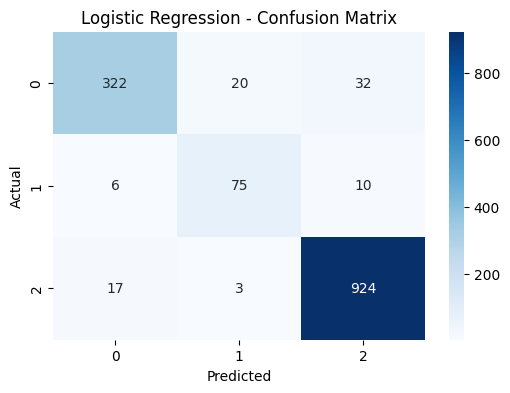

In [49]:
cm_log = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(6,4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Tuned Logistic Regression
log_model_tuned = LogisticRegression(
    C=1.0,              # regularization strength
    solver='lbfgs',     # stable solver
    max_iter=1000,      # avoid convergence warning
    multi_class='auto'
)

# Train model
log_model_tuned.fit(X_train_scaled, y_train)

# Predict
y_pred_log_tuned = log_model_tuned.predict(X_test_scaled)

# Evaluation
print("TUNED LOGISTIC REGRESSION RESULTS")
print("Accuracy:", accuracy_score(y_test, y_pred_log_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_tuned))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


TUNED LOGISTIC REGRESSION RESULTS
Accuracy: 0.9375443577004968

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.90       374
           1       0.77      0.82      0.79        91
           2       0.96      0.98      0.97       944

    accuracy                           0.94      1409
   macro avg       0.89      0.89      0.89      1409
weighted avg       0.94      0.94      0.94      1409



In [51]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [52]:
y_pred_rf = rf_model.predict(X_test)

print("RANDOM FOREST RESULTS")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

RANDOM FOREST RESULTS
Accuracy: 0.9652235628105039

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93       374
           1       0.87      0.98      0.92        91
           2       0.96      1.00      0.98       944

    accuracy                           0.97      1409
   macro avg       0.94      0.95      0.95      1409
weighted avg       0.97      0.97      0.96      1409



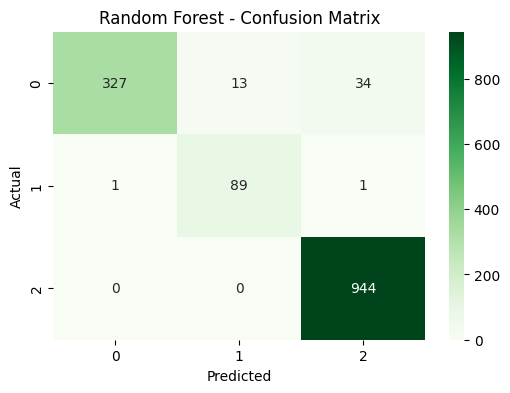

In [53]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [54]:
feature_importance = pd.Series(rf_model.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_importance.head(10)

,0
churn_reason,0.335422
churn_category,0.147616
tenure_in_months,0.136359
total_revenue,0.074837
contract,0.073916
total_charges,0.062864
total_long_distance_charges,0.026985
number_of_referrals,0.025170
monthly_charge,0.024926
number_of_dependents,0.011988


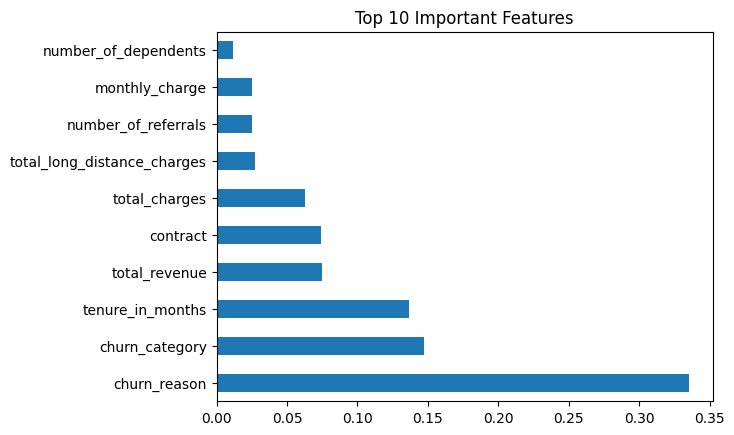

In [55]:
feature_importance.head(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

In [56]:
import joblib

# Save trained model
joblib.dump(rf_model, "customer_churn_model.pkl")

# Save the scaler
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


In [57]:
# Load model and scaler
loaded_model = joblib.load("customer_churn_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")

In [58]:
df['Predicted_Churn'] = rf_model.predict(X)

In [59]:
df.to_csv("churn_prediction_data.csv", index=False)